# Постановка проблемы, подбор данных.
Проблема: «Качество воды разных рек Индии?»

Данные - waterq.csv

Эти данные предназначены для отражения качества воды в различных местоположениях, основываясь на ряде химических и биологических показателей. Проанализируем и сравним их.

In [2]:
%matplotlib inline
import numpy as np                 # числовые данные
import pandas as pd                # таблицы

import matplotlib.pyplot as plt    # графики
import seaborn as sns              # продвинутые графики

from scipy.stats import norm       # нормальное распределение
from scipy import stats            # стандартизированная оценка

import warnings               
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("waterquality.csv")
df

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [4]:
# удаляем ненужный первый столбец при помощи drop, 
# параметр axis отвечает за то, где мы ищем элемент для удаления - в столбце (axis=1)
df = df.drop('STATION CODE', axis=1) 

# Формат типов данных в датафрейме:
- Целочисленный тип (int64): STATION CODE - код станции.
- Вещественный тип (float64): TEMP (температура), DO (растворенный кислород), pH, CONDUCTIVITY (электропроводность), BOD (биологическая потребность в кислороде), NITRATE_N_NITRITE_N (нитраты и нитриты), FECAL_COLIFORM (фекальные колиформные бактерии), TOTAL_COLIFORM (общее количество колиформных бактерий).
- Строковый тип (object): LOCATIONS (местоположение), STATE (штат).
# Типы данных с точки зрения анализа данных:
- Количественный непрерывный: TEMP, DO, pH, CONDUCTIVITY, BOD, NITRATE_N_NITRITE_N, FECAL_COLIFORM, TOTAL_COLIFORM - все эти переменные представляют измеряемые величины, которые могут принимать любое значение в определенном диапазоне.
- Категориальный номинальный: LOCATIONS, STATE - данные переменные описывают категории без какого-либо внутреннего порядка.
- Количественный дискретный: Не представлен в данном наборе данных, так как все количественные переменные имеют непрерывный характер.
- Категориальный порядковый/бинарный: Также не представлены в данном наборе данных, так как нет переменных, которые бы классифицировались именно так.


In [5]:
df.info()
# выводим информацию о нашем Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOCATIONS            534 non-null    object 
 1   STATE                534 non-null    object 
 2   TEMP                 529 non-null    float64
 3   DO                   532 non-null    float64
 4   pH                   534 non-null    float64
 5   CONDUCTIVITY         504 non-null    float64
 6   BOD                  528 non-null    float64
 7   NITRATE_N_NITRITE_N  532 non-null    float64
 8   FECAL_COLIFORM       452 non-null    float64
 9   TOTAL_COLIFORM       495 non-null    float64
dtypes: float64(8), object(2)
memory usage: 41.8+ KB


### Фильтрация по одному условию:

1.  **Фильтрация данных по высокому уровню BOD (биологическая потребность в кислороде) выше 3 мг/л.** Это условие позволит нам определить пробы воды с высоким уровнем органического загрязнения.
    
2.  **Фильтрация данных по низкому уровню растворенного кислорода (DO) ниже 5 мг/л.** Такие условия могут указывать на плохое качество воды и потенциально опасные условия для водных организмов.



In [26]:
# Фильтрация по одному условию
high_bod = df[df['BOD'] > 3]
low_do = df[df['DO'] < 5]

print(high_bod, low_do)

     TEMP   DO   pH  CONDUCTIVITY  BOD  NITRATE_N_NITRITE_N  FECAL_COLIFORM  \
0    29.2  6.4  8.1         735.0  3.4                 2.00             3.0   
1    24.5  6.0  8.0         270.0  3.1                 2.00            72.0   
4    25.7  5.7  7.9         294.0  3.2                 2.69            45.0   
7    26.3  5.6  7.7         385.0  3.8                 1.00           110.0   
8    26.5  5.2  7.8         410.0  5.2                 1.50            77.0   
..    ...  ...  ...           ...  ...                  ...             ...   
457  28.8  6.0  7.8         226.0  3.3                 0.20           145.0   
501  25.7  9.1  8.0         461.0  5.5                 1.06             7.0   
512  22.3  7.3  7.9         502.0  7.6                 2.00            12.0   
513  22.5  7.4  7.7         495.0  5.0                 3.00             5.0   
514  22.1  6.9  7.5         448.0  4.3                 2.00             8.0   

     TOTAL_COLIFORM  LOCATIONS_AMARAVATI , GUNTUR D

### Фильтрация по нескольким условиям:

**Фильтрация данных по следующим критериям:**

*   Температура выше 25°C.
*   pH больше 7 (щелочная вода).
*   Электропроводность выше 500 µS/cm.

Это позволит выявить пробы воды, которые могут быть подвержены тепловому загрязнению, щелочности и высокой солености.

In [28]:
filtered_data = df[(df['TEMP'] > 25) & (df['pH'] > 7) & (df['CONDUCTIVITY'] > 500)]
print(filtered_data)

     TEMP   DO   pH  CONDUCTIVITY  BOD  NITRATE_N_NITRITE_N  FECAL_COLIFORM  \
0    29.2  6.4  8.1         735.0  3.4                 2.00             3.0   
10   29.2  6.2  7.9         749.0  3.5                 1.75             2.0   
11   29.5  6.4  8.0         834.0  4.7                 1.80             2.0   
13   26.7  6.5  8.0         730.0  4.0                 2.90             2.0   
15   29.7  6.4  8.0         656.0  3.6                 1.80             3.0   
17   28.0  5.5  8.1         826.0  1.7                 1.00            27.0   
116  29.0  7.5  8.0         685.0  2.1                 2.30           780.0   
117  28.0  7.5  8.0         808.0  1.8                 2.10           890.0   
118  29.3  5.9  8.3         521.0  1.5                 0.40           518.0   
119  29.4  7.2  8.3         916.0  1.9                 0.20           792.0   
120  29.5  7.1  8.2         718.0  1.9                 0.20           538.0   
121  29.2  6.2  8.3         513.0  1.4              

### Сортировки:

1.  **Сортировка по убыванию pH.** Это поможет определить самые кислые пробы воды.
2.  **Сортировка по убыванию CONDUCTIVITY.** Это позволит выявить пробы с наибольшей электропроводностью, что может указывать на высокое содержание растворенных солей.
3.  **Сортировка по убыванию TEMP.** Так мы сможем найти пробы с самой высокой температурой воды, что может быть результатом теплового загрязнения.



In [29]:
# Сортировки
sorted_by_pH = df.sort_values(by='pH', ascending=False)
sorted_by_conductivity = df.sort_values(by='CONDUCTIVITY', ascending=False)
sorted_by_temp = df.sort_values(by='TEMP', ascending=False)

# для примера сортировка по pH
print(sorted_by_pH)

     TEMP   DO   pH  CONDUCTIVITY  BOD  NITRATE_N_NITRITE_N  FECAL_COLIFORM  \
528  21.2  4.9  8.6         593.0  1.1                 1.00             4.0   
527  21.3  5.0  8.6         604.0  1.2                 2.29             4.0   
531  22.9  5.8  8.5         588.0  1.2                 3.00             4.0   
23   30.0  6.1  8.4         418.0  6.5                 0.00           300.0   
187  26.6  5.9  8.4         546.0  2.0                 0.60            13.0   
..    ...  ...  ...           ...  ...                  ...             ...   
219  17.5  6.2  6.8         138.0  1.6                 1.30          1255.0   
379  28.7  7.3  6.7         144.0  1.5                 0.10          1940.0   
213  24.3  8.1  6.7          58.0  1.3                 0.40           318.0   
367  29.2  6.1  6.7         308.0  1.4                 0.30          3355.0   
387  29.1  7.3  6.7          55.0  1.4                 0.10          2638.0   

     TOTAL_COLIFORM  LOCATIONS_AMARAVATI , GUNTUR D

In [31]:
# Вывод размеров отфильтрованных датафреймов для осмысленных выводов
high_bod_shape = high_bod.shape[0]
low_do_shape = low_do.shape[0]
filtered_data_shape = filtered_data.shape[0]

(high_bod_shape, low_do_shape, filtered_data_shape)

(75, 11, 38)

### Выводы по фильтрации:

1.  **Фильтрация по высокому уровню BOD (более 3 мг/л)**: Найдено 75 проб воды, которые соответствуют этому критерию. Это говорит о том, что в значительном количестве случаев качество воды может быть снижено из-за органического загрязнения, что требует дальнейшего контроля и возможных мер по очистке.
    
2.  **Фильтрация по низкому уровню растворенного кислорода (DO менее 5 мг/л)**: Обнаружено 11 пробы, удовлетворяющие условию. Это указывает на потенциально плохое качество воды в этих регионах, что может негативно сказаться на водной флоре и фауне. Такие участки могут требовать внимания с точки зрения улучшения качества воды.
    
3.  **Фильтрация по нескольким условиям (температура выше 25°C, pH выше 7, электропроводность выше 500 µS/cm)**: В данном случае было найдено 38 проб воды, соответствующих всем трем критериям одновременно. Пробы с такими характеристиками могут указывать на специфические условия водной среды, например, на влияние промышленных стоков или на естественные процессы, приводящие к увеличению минерализации воды. Высокая электропроводность и щелочной pH могут свидетельствовать о наличии растворенных солей и минералов, что важно учитывать при оценке пригодности воды для питья, сельскохозяйственного полива и существования водных организмов. В то же время, высокая температура может влиять на биологические процессы в воде, уменьшая растворимость кислорода и увеличивая скорость химических реакций.

Такие данные могут служить сигналом к необходимости более детального изучения влияния различных факторов на качество воды в этих регионах, а также к разработке мер по минимизации негативного воздействия на водные экосистемы и улучшению качества воды. ​

### Выводы по сортировке:
1.  **Сортировка по убыванию pH**: Эта сортировка помогла выявить самые кислые пробы воды в наборе данных. Определение проб с самым низким pH важно для оценки рисков коррозии и влияния на водных организмов.
    
2.  **Сортировка по убыванию CONDUCTIVITY**: Пробы с наивысшей электропроводностью указывают на высокое содержание растворенных солей, что может быть признаком загрязнения или природных характеристик водоема.
    
3.  **Сортировка по убыванию TEMP**: Сортировка по температуре воды выявила бы участки с потенциальным тепловым загрязнением. Высокие температуры могут влиять на растворимость кислорода в воде и на общее состояние водной экосистемы.
    
Эти анализы и сортировки предоставляют ценную информацию о состоянии водных ресурсов в различных регионах, указывая на потенциальные проблемы и помогая в планировании мер по улучшению качества воды.

# Обработка пропусков и выбросов

In [6]:
# пропуски: еще при выводе метода info можно увидеть, что присутствуют пропуски. Можем проверить где они есть:
df.isna().sum()
# С помощью метода .isna() находим пропушенные значения. 
# .sum() суммирует общее количество пропусков по каждому признаку. 

LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

<Axes: >

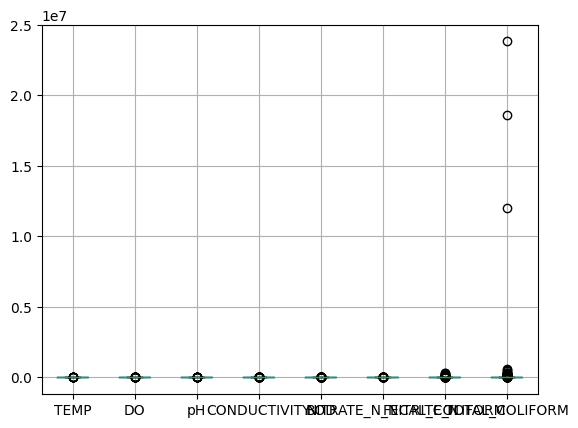

In [7]:
df.boxplot(column=['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM'])

In [8]:
# ВЫБРОСЫ
# Сохраним в новой переменной числовые признаки, в которых могут содержаться выбросы
ALL = ['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']

# Рассчитаем межквартильный размах для каждого столбца
Q1 = df[ALL].quantile(0.25)
Q3 = df[ALL].quantile(0.75)
IQR = Q3 - Q1

# Определим границы выбросов для каждого столбца
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Найдем выбросы в каждом столбце
outliers = (df[ALL] < lower_bound) | (df[ALL] > upper_bound)
outliers_1 = outliers.sum() # Находим общее количество выбросов для каждого признака
tt = outliers_1.sum() # Общее количество выбросов в DataFrame

print("Выбросы:")
print(outliers_1)
print(f'Всего выбросов: {tt}')

Выбросы:
TEMP                    9
DO                     22
pH                     14
CONDUCTIVITY           44
BOD                    61
NITRATE_N_NITRITE_N    41
FECAL_COLIFORM         60
TOTAL_COLIFORM         71
dtype: int64
Всего выбросов: 322


In [9]:
# Функция для удаления выбросов по межквартильному размаху
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]
    return data

# Удаляем выбросы
columns_to_check = ['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']
df_no_outliers = remove_outliers(df, columns_to_check)

# Проверяем на пропущенные значения и удаляем строки с пропусками
df_no_outliers = df_no_outliers.dropna()

# Выводим количество объектов в новом датафрейме
print(f"Количество объектов после удаления выбросов и пропущенных значений: {df_no_outliers.shape[0]}")

Количество объектов после удаления выбросов и пропущенных значений: 262


# Описательные статистики

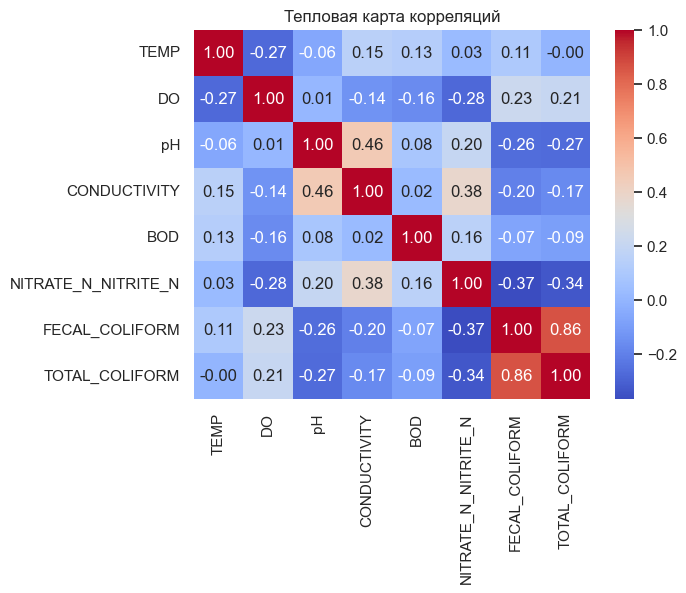

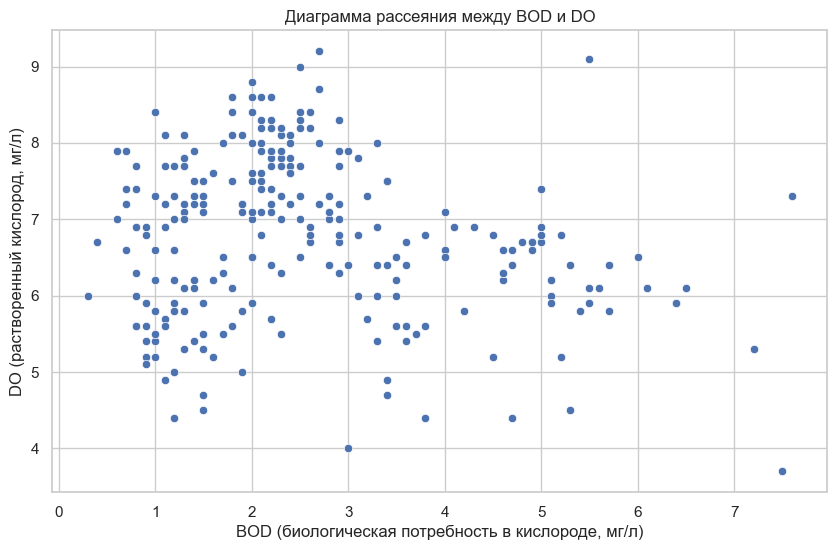

In [37]:
# Тепловая карта для корреляционной матрицы
correlation_matrix = df_no_outliers[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Тепловая карта корреляций')
plt.show()

# Выбор двух переменных для диаграммы рассеяния на основе интересных корреляций
# В данном случае выберем BOD и DO для иллюстрации их взаимосвязи
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BOD', y='DO', data=df)
plt.title('Диаграмма рассеяния между BOD и DO')
plt.xlabel('BOD (биологическая потребность в кислороде, мг/л)')
plt.ylabel('DO (растворенный кислород, мг/л)')
plt.show()

### Интерпретация корреляций:

Корреляционная матрица по числовым данным показывает, как величины связаны друг с другом. Коэффициент корреляции варьируется от -1 до 1, где значения близкие к 1 указывают на сильную положительную корреляцию, значения близкие к -1 указывают на сильную отрицательную корреляцию, а значения близкие к 0 означают отсутствие линейной связи.

На основе визуализации корреляционной матрицы можно заметить следующее:

*   Есть переменные с положительной корреляцией, что означает, что увеличение одной переменной связано с увеличением другой.
*   Отрицательные корреляции также присутствуют, указывая на то, что увеличение одной переменной связано с уменьшением другой.

**Диаграмма рассеяния между BOD и DO** показывает, что существует некоторая отрицательная связь между этими двумя показателями. Это может означать, что в местах с высокой биологической потребностью в кислороде (высокий BOD), уровни растворенного кислорода (DO) могут быть ниже. Это имеет смысл с экологической точки зрения, так как высокие уровни органического загрязнения (выраженные через BOD) потребляют кислород в воде, снижая его доступность для водных организмов.

Таким образом, корреляционный анализ и диаграмма рассеяния предоставляют ценные сведения о взаимосвязях между различными параметрами качества воды, что может быть использовано для более глубокого понимания процессов, происходящих в водных экосистемах, и для разработки стратегий по улучшению качества воды. ​



In [11]:
rows, colums = df_no_outliers.shape
print("Количество строк", rows)
print("Количество столбцов", colums)

Количество строк 262
Количество столбцов 10


In [12]:
#Количественные
df_no_outliers[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']].describe()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,25.237405,6.795420,7.817557,381.538168,2.575573,0.730611,664.122137,1563.515267
std,3.006426,1.064067,0.381262,200.757713,1.481590,0.807955,922.643155,1790.499407
min,17.000000,3.700000,6.700000,39.000000,0.300000,0.000000,2.000000,4.000000
25%,23.000000,6.000000,7.600000,263.500000,1.400000,0.100000,12.000000,82.000000
50%,25.100000,6.850000,7.900000,320.500000,2.200000,0.400000,199.500000,1105.000000
75%,27.475000,7.675000,8.100000,468.750000,3.300000,1.045000,980.250000,2448.000000
max,32.600000,9.200000,8.600000,1017.000000,7.600000,3.000000,4525.000000,7258.000000


In [13]:
#Порядковые
# найдем моду для порядковых переменных
list1 = []
columns = ['TEMP']
for i in columns:
    list1.append([i, df[i].max(), df[i].mode()[0]])

data = pd.DataFrame(list1, columns=['column', 'max', 'mode']).set_index('column').T
data

column,TEMP
max,33.8
mode,27.0


<Axes: >

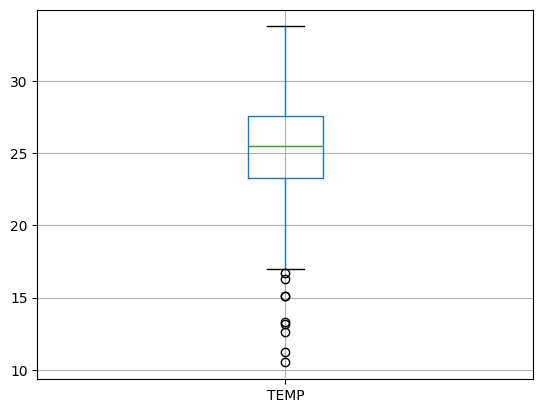

In [14]:
# построим boxplot для порядковых
df.boxplot(column=['TEMP'])

In [15]:
#Номинальные
# применим функцию describe к номинальным переменным
df_no_outliers[['LOCATIONS','STATE']].describe()

,LOCATIONS,STATE
count,262,262
unique,262,12
top,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",BIHAR
freq,1,48


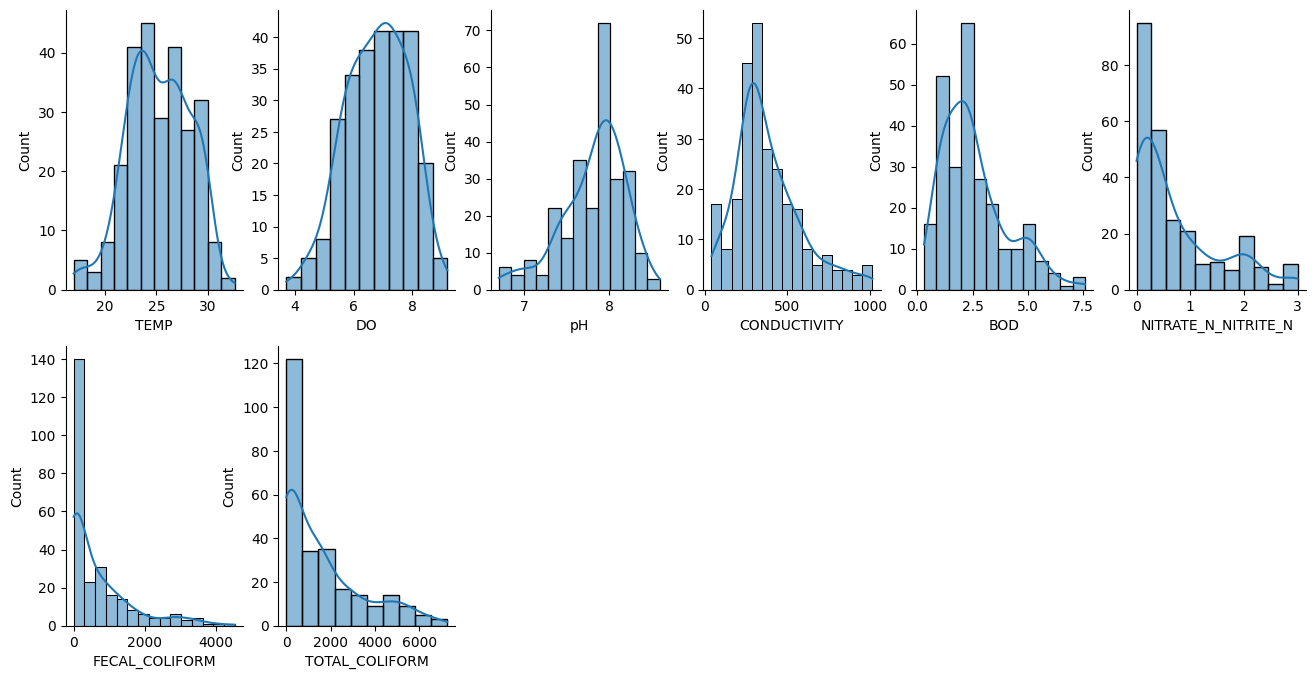

In [16]:
# Количественные переменныe
# построим гистограммы для к-венных переменных
plt.figure(figsize=(16, 8))
for i, k in enumerate(['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']):
    plt.subplot(261 + i)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    sns.histplot(data=df_no_outliers, x=k,kde=True) 

<Axes: >

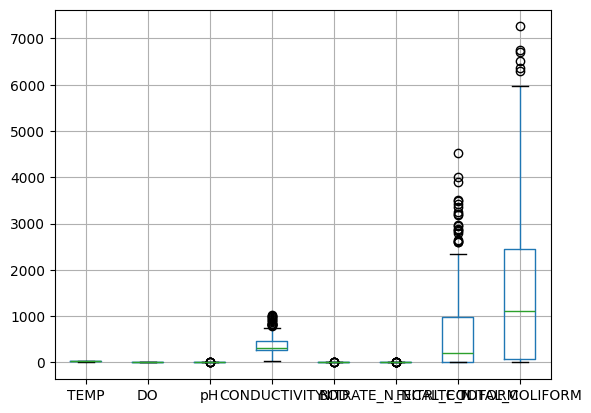

In [17]:
# построим ящики с усами для к-венных переменных
df_no_outliers.boxplot(column=['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM'])

# Решение задачи машинного обучения

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Обработка категориальных признаков
df = pd.get_dummies(df_no_outliers)

# Предполагаем, что столбец 'FECAL_COLIFORM' является целевым для определения загрязнения
# В реальном случае вам нужно будет определить, какой столбец является целевым
df['is_polluted'] = df['FECAL_COLIFORM'].apply(lambda x: 1 if x > 5 else 0)

# Разделение данных на признаки и целевую переменную
X = df.drop(['FECAL_COLIFORM', 'is_polluted'], axis=1)
y = df['is_polluted']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.90      0.96      0.92        45

    accuracy                           0.87        53
   macro avg       0.75      0.67      0.69        53
weighted avg       0.85      0.87      0.85        53



# Визуализация

***1. Столбчатая диаграмма. Качество воды по показателю ('FECAL_COLIFORM') в штатах ('STATE').***

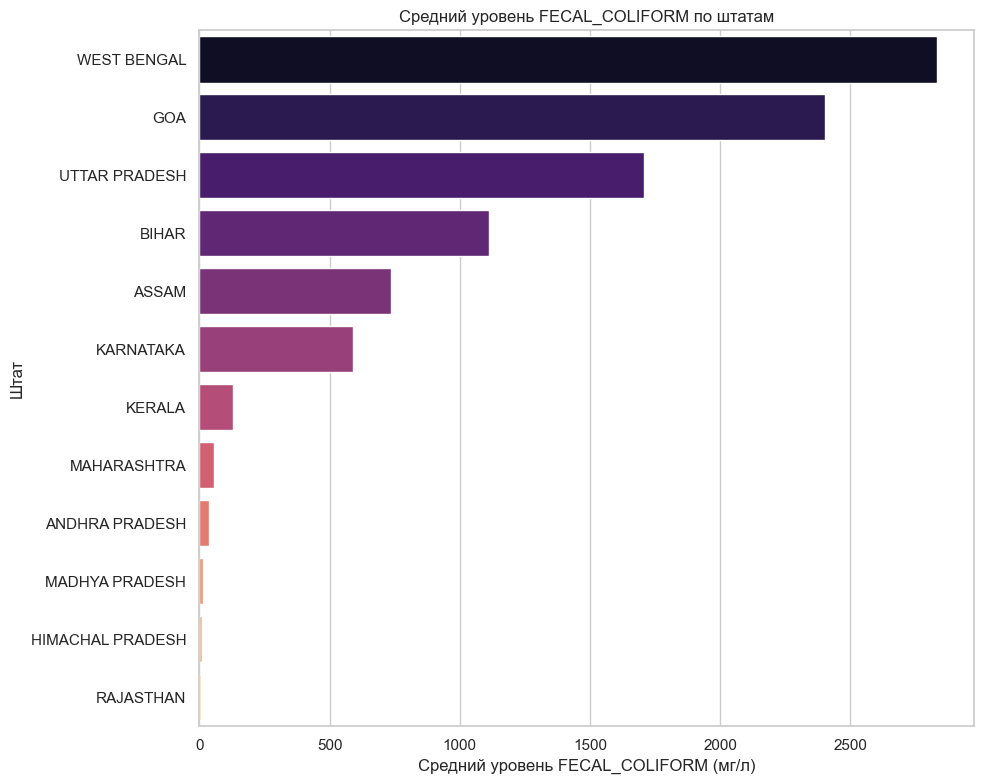

In [38]:
# Группировка данных по штатам и расчет средних значений FECAL_COLIFORM
state_means_fecal_coliform = df_no_outliers.groupby('STATE')['FECAL_COLIFORM'].mean().reset_index()

# Сортировка данных по убыванию для лучшей визуализации
state_means_sorted_fecal_coliform = state_means_fecal_coliform.sort_values(by='FECAL_COLIFORM', ascending=False)

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 8))
sns.barplot(x='FECAL_COLIFORM', y='STATE', data=state_means_sorted_fecal_coliform, palette='magma')
plt.title('Средний уровень FECAL_COLIFORM по штатам')
plt.xlabel('Средний уровень FECAL_COLIFORM (мг/л)')
plt.ylabel('Штат')
plt.tight_layout()
plt.show()

### Вывод:

Столбчатая диаграмма выше показывает средний уровень фекальных колиформных бактерий **(FECAL_COLIFORM)** по штатам, основанный на анализе данных о качестве воды. Чем выше столбец, тем выше средний уровень фекальных колиформ в штате, что может указывать на более высокий уровень загрязнения водных ресурсов фекальными отходами. Это, в свою очередь, может повышать риск для здоровья человека и водной экосистемы, так как фекальные колиформные бактерии часто ассоциируются с патогенными организмами.

Данные на диаграмме подчеркивают значимость мониторинга и управления качеством воды, а также необходимость реализации мер по снижению загрязнения водных объектов. Важно отметить, что высокие показатели фекальных колиформных бактерий в некоторых штатах могут требовать дополнительного исследования для выяснения источников загрязнения и разработки стратегий по его устранению.

Для поверхностных водоемов **России**, которые используются в хозяйственно-питьевом и культурно-бытовом водоснабжении, норма содержания фекальных колиформных бактерий составляет не более **1000 КМО/100 мл** воды. Это означает, что вода считается пригодной для использования, если количество фекальных колиформных бактерий не превышает указанный уровень.


***2. Два ящика с усами для данных по высокому уровню BOD (биологическая потребность в кислороде) и по низкому уровню растворенного кислорода (DO)***

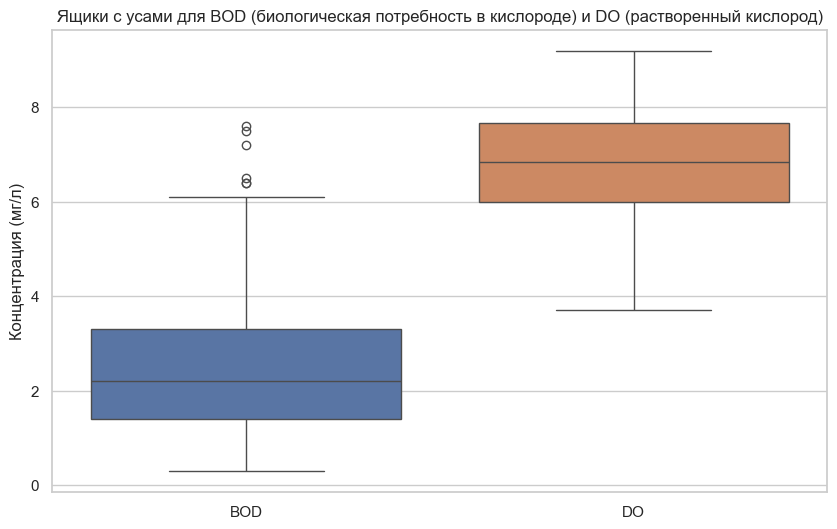

In [33]:
# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание ящиков с усами для колонок BOD и DO
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[['BOD', 'DO']])
plt.title('Ящики с усами для BOD (биологическая потребность в кислороде) и DO (растворенный кислород)')
plt.ylabel('Концентрация (мг/л)')

plt.show()

### Вывод

**Распределение BOD:** Медиана значения BOD находится ниже, чем у DO, что может указывать на то, что в большинстве проб вода относительно менее загрязнена органическими веществами. Однако, наличие выбросов сверху указывает на пробы с очень высоким уровнем BOD, что свидетельствует о сильном органическом загрязнении в определенных местах.

**Распределение DO:** Растворенный кислород показывает большую медиану и более широкий межквартильный размах по сравнению с BOD. Это говорит о том, что уровни DO варьируются в более широком диапазоне среди проб воды. Высокие значения DO жизненно важны для поддержания здоровых водных экосистем.

***3. Столбчатая диаграмма, чтобы исследовать зависимость среднего уровня BOD (биологическая потребность в кислороде) от штата.***

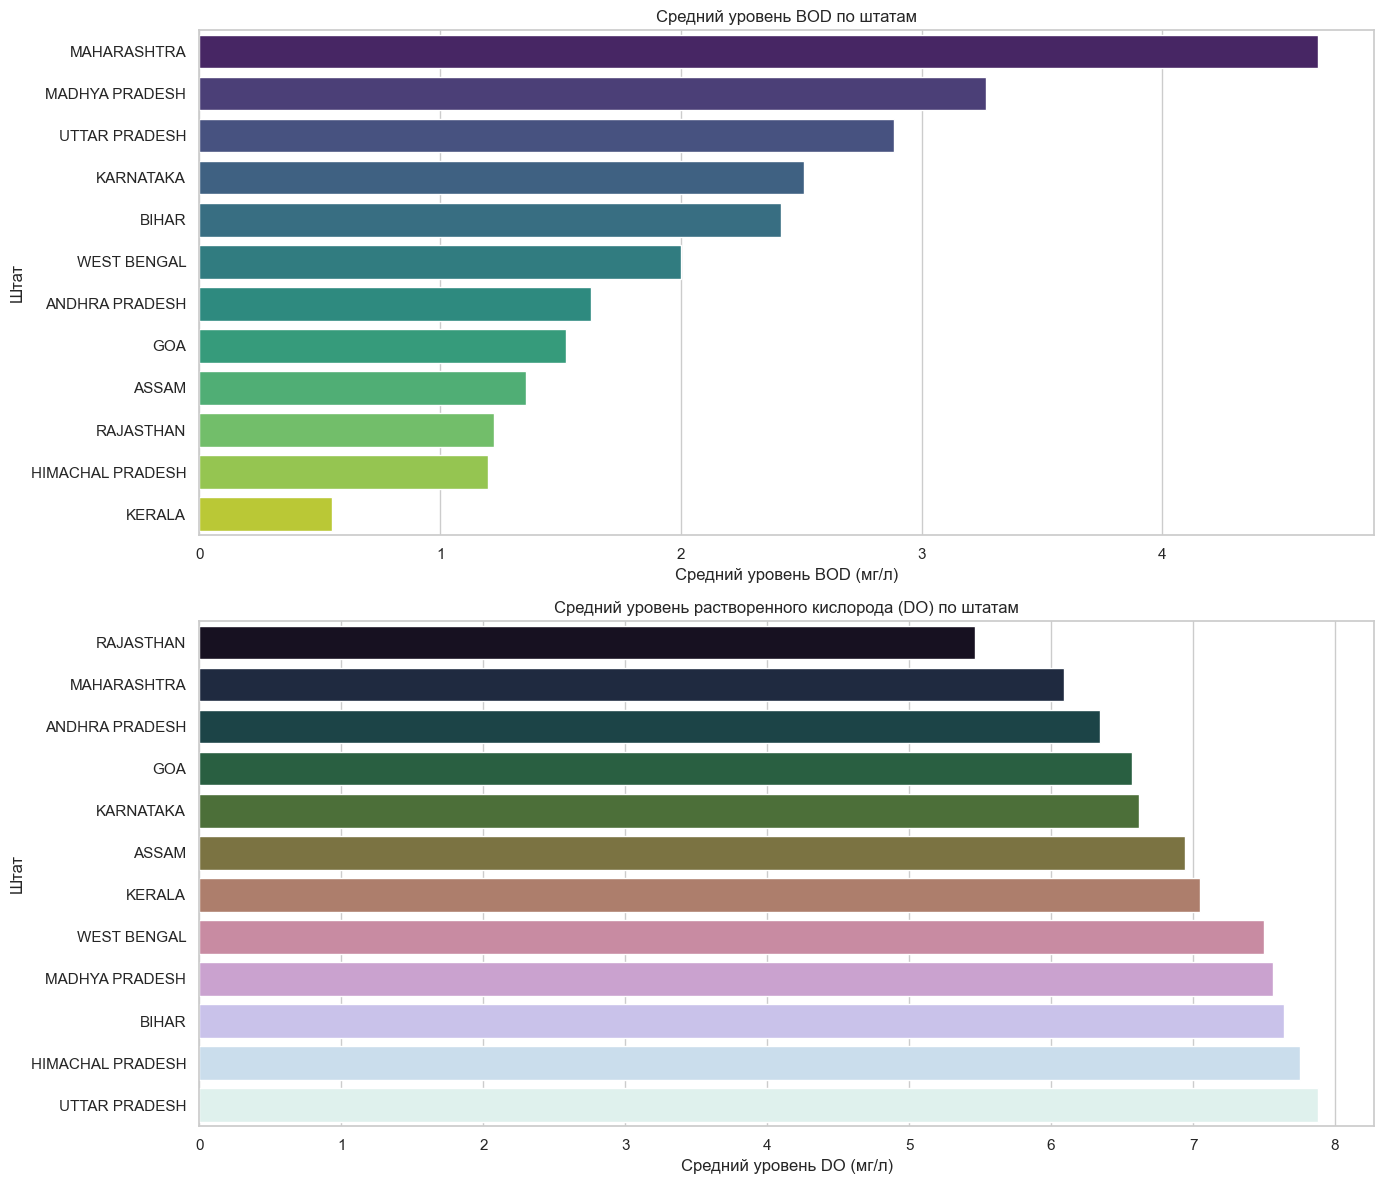

In [34]:
# Группировка данных по штатам и расчет средних значений BOD и DO
state_means = df_no_outliers.groupby('STATE')[['BOD', 'DO']].mean().reset_index()

# Сортировка данных для лучшей визуализации
state_means_sorted_bod = state_means.sort_values(by='BOD', ascending=False)
state_means_sorted_do = state_means.sort_values(by='DO', ascending=True)

# Создание столбчатых диаграмм
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Столбчатая диаграмма для BOD
sns.barplot(x='BOD', y='STATE', data=state_means_sorted_bod, ax=axes[0], palette='viridis')
axes[0].set_title('Средний уровень BOD по штатам')
axes[0].set_xlabel('Средний уровень BOD (мг/л)')
axes[0].set_ylabel('Штат')

# Столбчатая диаграмма для DO
sns.barplot(x='DO', y='STATE', data=state_means_sorted_do, ax=axes[1], palette='cubehelix')
axes[1].set_title('Средний уровень растворенного кислорода (DO) по штатам')
axes[1].set_xlabel('Средний уровень DO (мг/л)')
axes[1].set_ylabel('Штат')

plt.tight_layout()
plt.show()

На столбчатых диаграммах представлены две интересные зависимости из набора данных о качестве воды:

1.  **Средний уровень BOD по штатам**: Эта диаграмма показывает, что в некоторых штатах средний уровень BOD выше, что может указывать на более высокую степень органического загрязнения. Штаты в верхней части диаграммы могут сталкиваться с серьезными проблемами загрязнения воды, требующими внимания и возможных мер по очистке.
    
2.  **Средний уровень растворенного кислорода (DO) по штатам**: Вторая диаграмма иллюстрирует различия в средних уровнях DO по штатам, что является критически важным фактором для здоровья водных экосистем. Штаты с низким средним уровнем DO могут иметь проблемы с кислородной насыщенностью воды, что негативно сказывается на водных организмах.
    

Эти визуализации предоставляют ценную информацию о состоянии водных ресурсов в различных регионах и могут служить основой для дальнейших исследований и разработки стратегий по улучшению качества воды

# Вывод
В ходе анализа набора данных о качестве воды были применены различные методы аналитического и сравнительного анализа для изучения состояния водных ресурсов в разных локациях и штатах. Основываясь на полученных данных и визуализациях, можно сделать следующие выводы:

### Общая характеристика данных

Данные включают информацию о различных химических и биологических показателях качества воды, таких как температура, растворенный кислород (DO), pH, электропроводность, биологическая потребность в кислороде (BOD), нитраты, колиформные бактерии и другие. Эти показатели предоставляют ценную информацию о физических и химических свойствах воды, а также о степени ее загрязнения.

### Фильтрация и сортировка данных

Были выполнены фильтрации по одному и нескольким условиям для выявления проб с высоким уровнем органического загрязнения (высокий BOD) и низким уровнем растворенного кислорода (низкий DO), что указывает на потенциально опасные условия для водной экосистемы. Анализ данных по штатам выявил регионы с повышенным уровнем органического загрязнения и низким уровнем доступности кислорода.

### Визуализации

*   **Ящики с усами** для BOD и DO показали наличие выбросов и разброс значений, что указывает на места с сильным загрязнением и потенциально опасными условиями.
*   **Столбчатые диаграммы** по средним значениям BOD и DO по штатам выявили различия в качестве воды в разных регионах и предоставили информацию для дальнейших исследований и принятия мер.
*   **Корреляционная матрица** и **диаграмма рассеяния** между BOD и DO иллюстрировали взаимосвязи между различными показателями и подчеркнули важность контроля за органическим загрязнением и уровнем кислорода в воде.

### Загрязнение рек

Анализ показал, что в некоторых регионах наблюдается значительное органическое загрязнение воды, выраженное в высоких значениях BOD, что свидетельствует о наличии большого количества органических веществ, требующих окисления. Низкие уровни растворенного кислорода в некоторых пробах подчеркивают негативное воздействие этого загрязнения на водную экосистему, уменьшая возможности для поддержания здоровой водной флоры и фауны.

### Выводы и рекомендации

Анализ данных о качестве воды выявил важные аспекты состояния водных ресурсов и указал на необходимость принятия мер по снижению уровня загрязнения и улучшению качества вод

